In [1]:
from __future__ import print_function
__author__ = "zeshi"

import numpy as np
from mysqldb_level0 import query_data_level0
import mysql.connector
from mysql.connector import errorcode
from datetime import datetime, date, timedelta
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def db_plot(site_name_id, node_id, level, starting_time, ending_time, field='snowdepth'):
    if isinstance(site_name_id, int):
        query = ("SELECT datetime, " + field + " FROM level_%s WHERE datetime >= %s AND datetime <= %s " + 
                 "AND node_id = %s AND site_id = %s")
    else:
        query = ("SELECT datetime, " + field + " FROM level_%s WHERE datetime >= %s AND datetime <= %s " + 
                 "AND node_id = %s AND site_id IN (SELECT site_id from sites where site_name = %s)")
    query_field = (level, starting_time, ending_time, node_id, site_name_id)
    cnx = mysql.connector.connect(user = "root", password = "root", database = "ar_data")
    cursor = cnx.cursor()
    try:
        cursor.execute(query, query_field)
        data_tuple = cursor.fetchall()
    except mysql.connector.Error as err:
        print(err)
        cursor.close()
        cnx.close()
        return
    cursor.close()
    cnx.close()
    print("DB query secceed!")
    if len(data_tuple) == 0:
        print("No data meet the input requirement!")
        return
    datetime_list = []
    data_list = []
    for row in data_tuple:
        datetime_list.append(row[0])
        data_list.append(row[1])
    data_list = np.array(data_list)
#     print(datetime_list, data_list)
    plt.plot_date(datetime_list, data_list, '.')
    plt.show()

1 1 2016-03-29 16:15:00
DB query secceed!


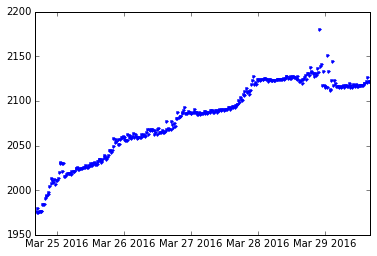

1 2 2015-12-15 15:00:00
DB query secceed!


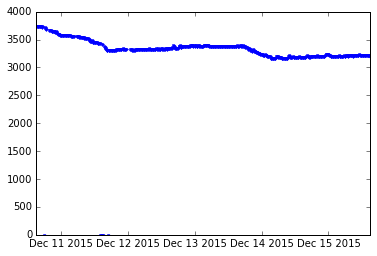

1 3 2016-03-29 16:30:00
DB query secceed!


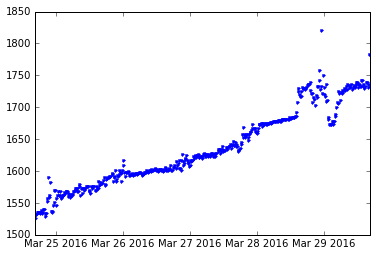

1 4 2016-03-18 23:30:00
DB query secceed!


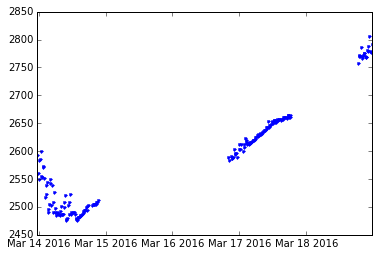

1 5 2016-03-29 16:15:00
DB query secceed!


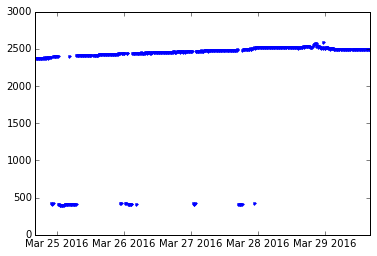

1 6 2016-03-29 16:30:00
DB query secceed!


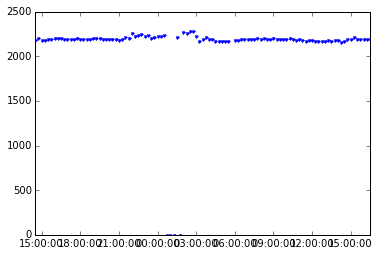

1 7 2016-03-29 16:30:00
DB query secceed!


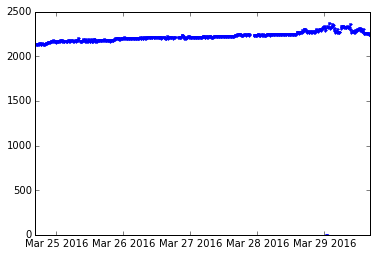

1 8 2016-03-29 16:30:00
DB query secceed!


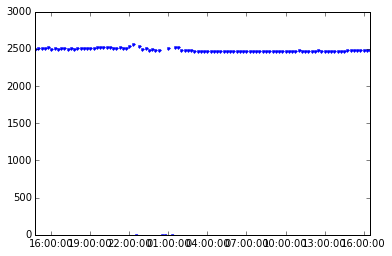

1 9 2016-03-29 16:30:00
DB query secceed!


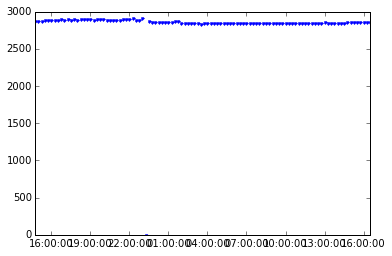

1 10 2015-11-27 16:15:00
DB query secceed!


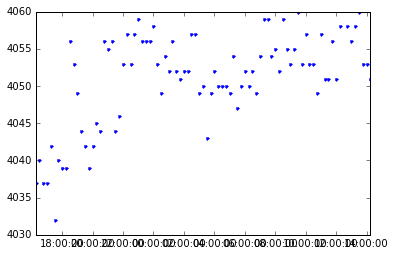

2 1 2016-02-12 16:00:00
DB query secceed!


ValueError: ordinal must be >= 1

2 2 2016-02-14 00:45:00
DB query secceed!


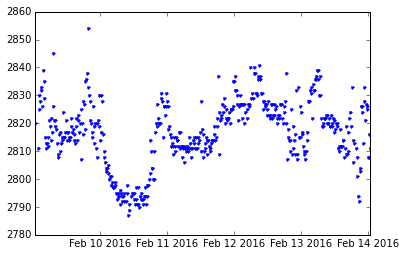

2 3 2016-02-13 19:15:00
DB query secceed!


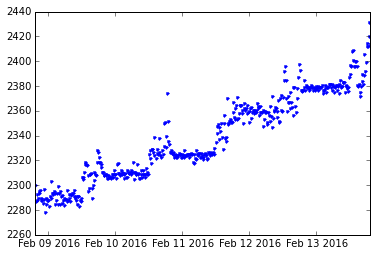

2 4 2016-02-14 00:45:00
DB query secceed!


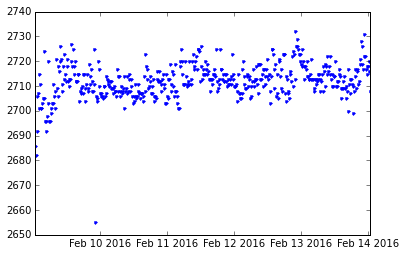

2 5 2016-02-13 17:00:00
DB query secceed!


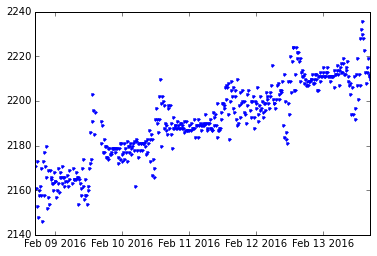

2 6 2016-02-04 18:15:00
DB query secceed!


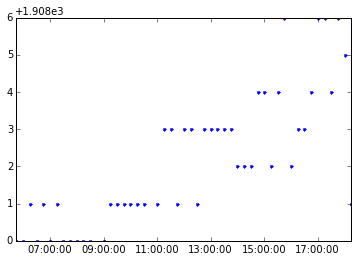

2 7 2016-02-14 00:30:00
DB query secceed!


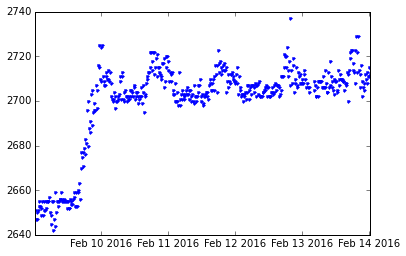

2 8 2016-02-14 00:45:00
DB query secceed!


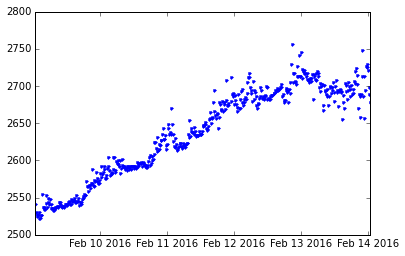

2 9 2015-11-17 08:45:00
DB query secceed!


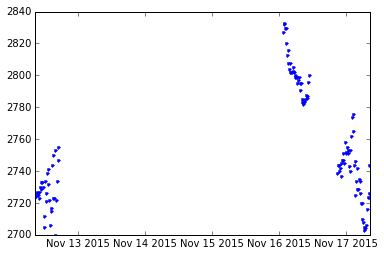

2 10 2015-11-17 09:15:00
DB query secceed!


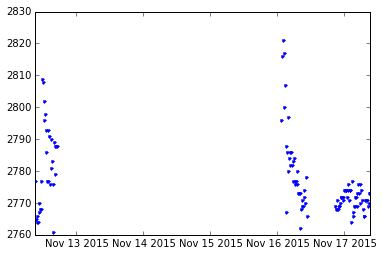

3 1 2016-03-29 00:00:00
DB query secceed!


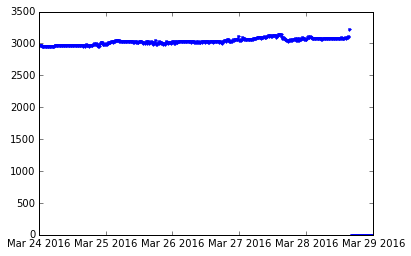

3 2 2016-03-29 00:00:00
DB query secceed!


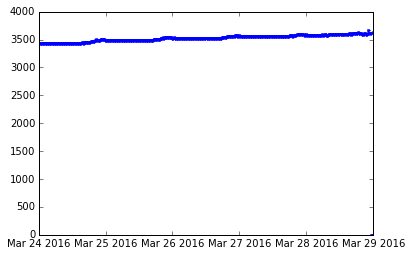

3 3 2016-03-28 23:45:00
DB query secceed!


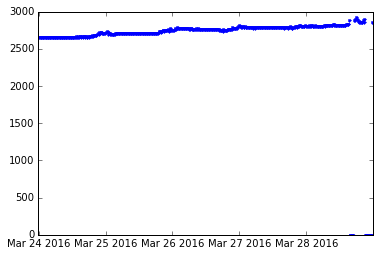

3 4 2015-08-11 18:45:00
DB query secceed!


ValueError: ordinal must be >= 1

3 5 2016-03-29 00:00:00
DB query secceed!


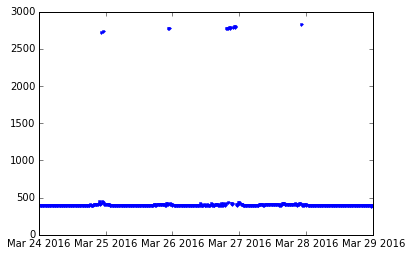

3 6 2016-03-29 00:00:00
DB query secceed!


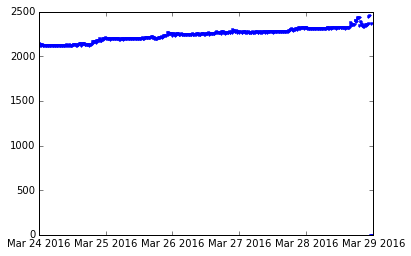

3 7 2016-03-29 00:15:00
DB query secceed!


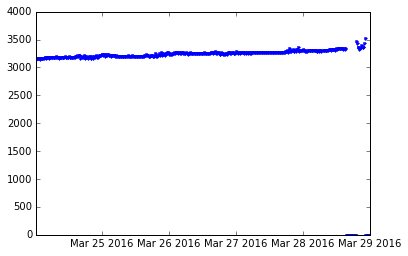

3 8 2016-03-29 00:00:00
DB query secceed!


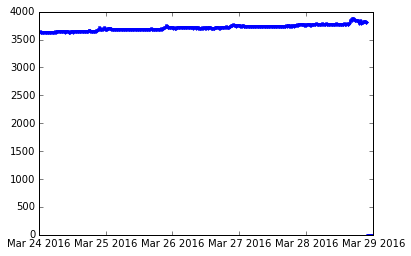

3 9 2016-03-29 00:00:00
DB query secceed!


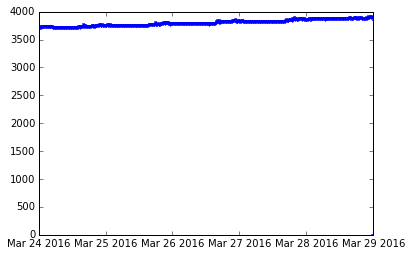

3 10 2016-03-28 04:45:00
DB query secceed!


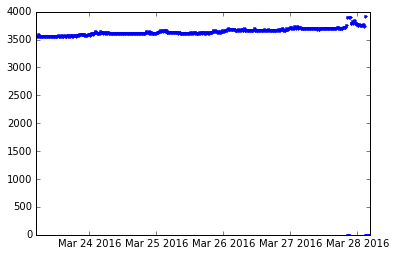

3 11 2016-03-29 00:15:00
DB query secceed!


ValueError: ordinal must be >= 1

4 1 None
4 2 None
4 3 None
4 4 None
4 5 None
4 6 None
4 7 None
4 8 None
4 9 None
4 10 None
5 1 2016-03-29 16:00:00
DB query secceed!


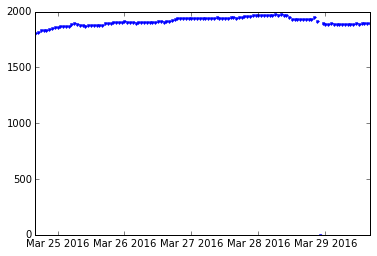

5 2 2016-03-29 12:00:00
DB query secceed!


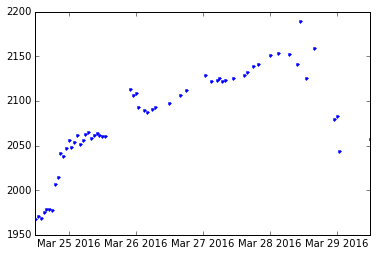

5 3 2016-03-29 16:00:00
DB query secceed!


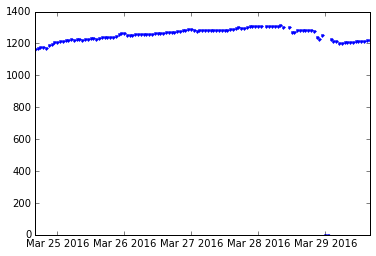

5 4 2016-03-29 12:00:00
DB query secceed!


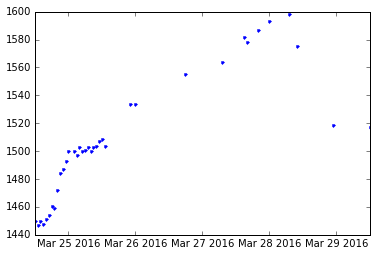

5 5 2016-03-28 13:00:00
DB query secceed!


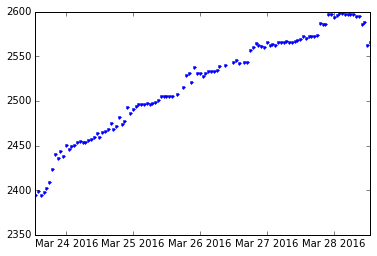

5 6 2016-03-29 15:45:00
DB query secceed!


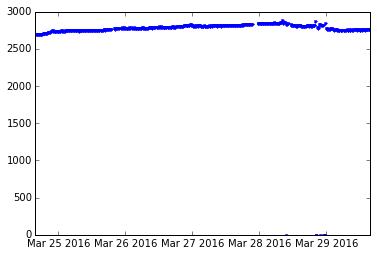

5 7 2016-03-29 15:00:00
DB query secceed!


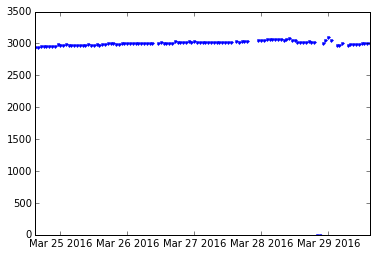

5 8 2016-03-29 15:00:00
DB query secceed!


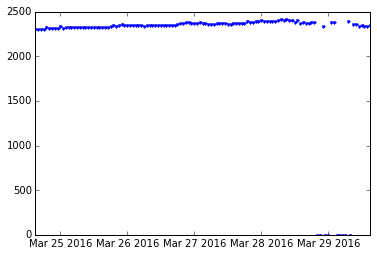

5 9 2016-03-29 15:45:00
DB query secceed!


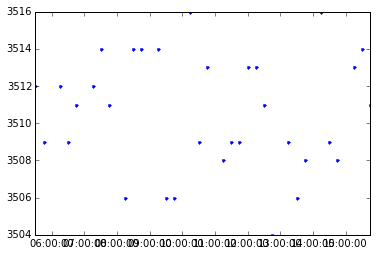

5 10 2016-03-29 16:00:00
DB query secceed!


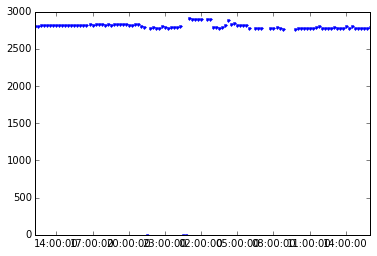

5 11 2016-03-29 16:00:00
DB query secceed!


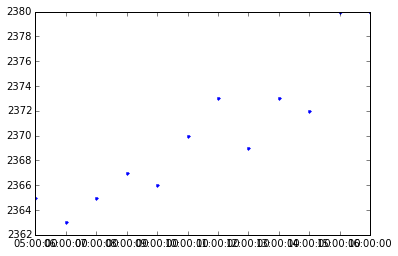

6 1 2016-03-29 16:15:00
DB query secceed!


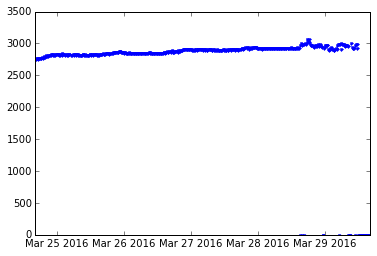

6 2 2016-01-13 16:15:00
DB query secceed!


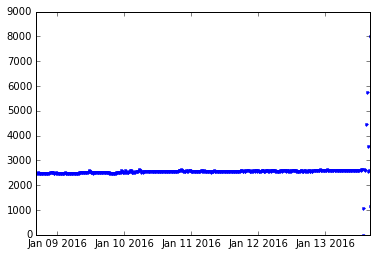

6 3 2015-11-24 20:30:00
DB query secceed!


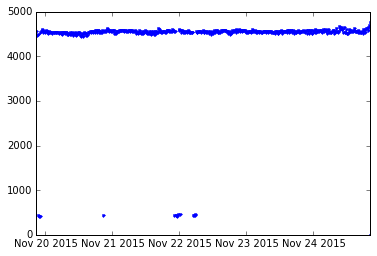

6 4 2016-02-19 11:30:00
DB query secceed!


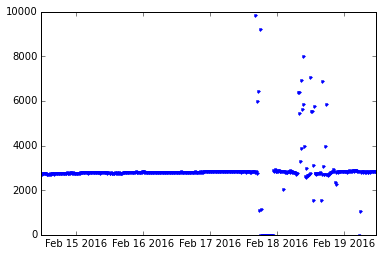

6 5 2016-03-29 16:00:00
DB query secceed!


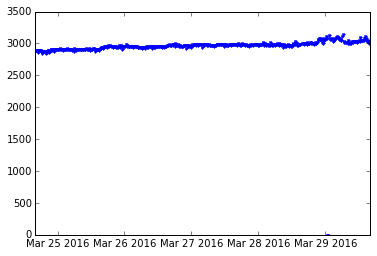

6 6 2016-03-29 16:00:00
DB query secceed!


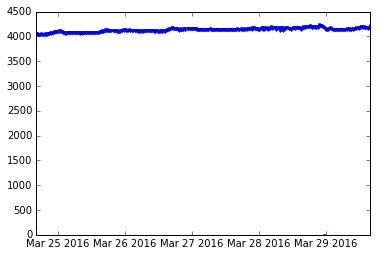

6 7 2016-03-29 16:00:00
DB query secceed!


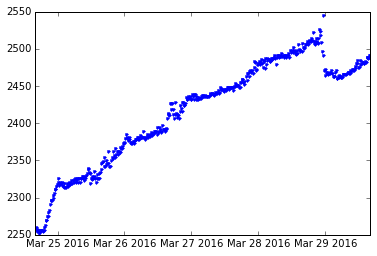

6 8 2016-03-29 16:00:00
DB query secceed!


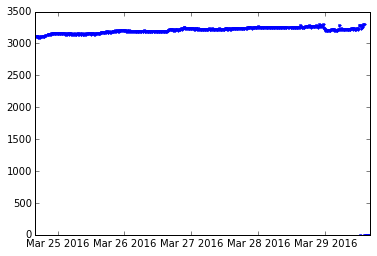

6 9 2016-03-29 04:00:00
DB query secceed!


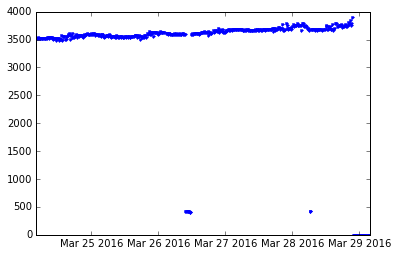

6 10 2016-03-14 02:30:00
DB query secceed!


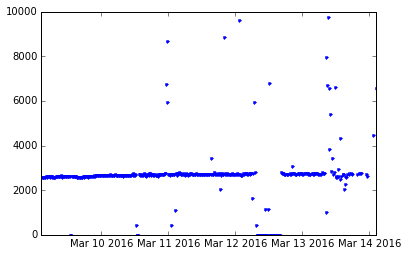

7 1 2015-04-21 22:30:00
DB query secceed!


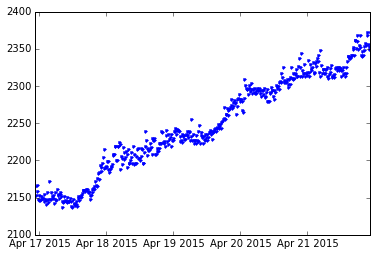

7 2 2014-11-29 06:45:00
DB query secceed!


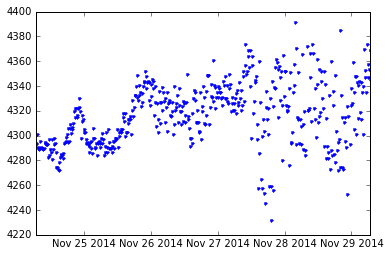

7 3 2015-12-06 07:30:00
DB query secceed!


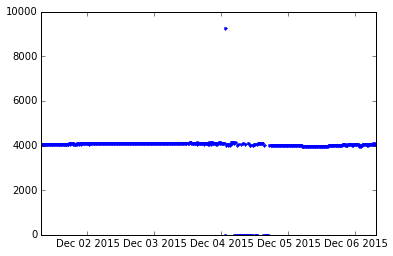

7 4 2015-12-22 13:00:00
DB query secceed!


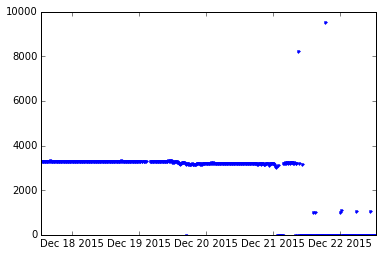

7 5 2015-12-22 13:00:00
DB query secceed!


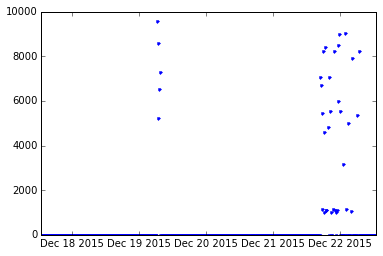

7 6 2015-12-22 12:00:00
DB query secceed!


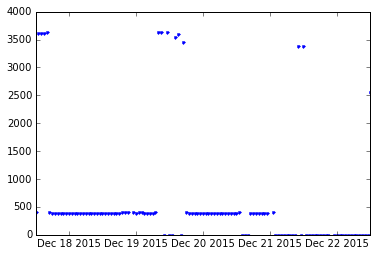

7 7 2015-12-22 13:00:00
DB query secceed!


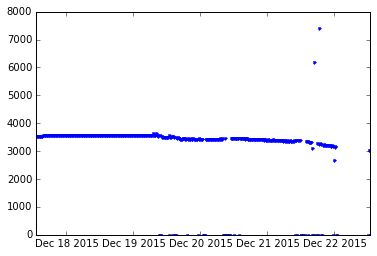

7 8 2015-12-22 13:00:00
DB query secceed!


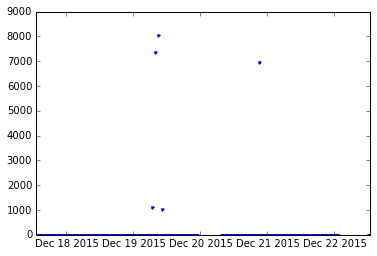

7 9 2015-04-21 22:30:00
DB query secceed!


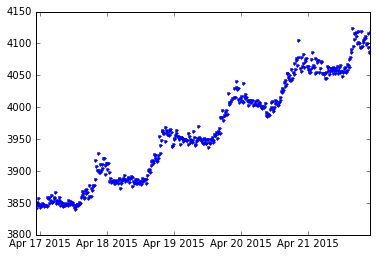

7 10 2015-09-17 21:45:00
DB query secceed!


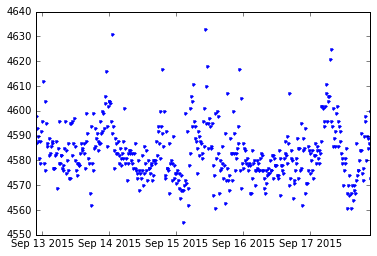

7 11 2015-12-25 20:00:00
DB query secceed!


ValueError: ordinal must be >= 1

8 1 2015-12-25 20:00:00
DB query secceed!


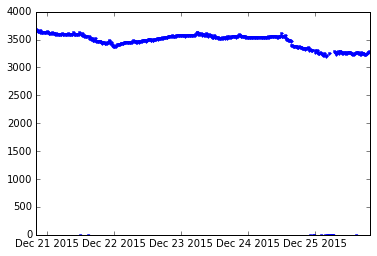

8 2 2015-12-24 06:00:00
DB query secceed!


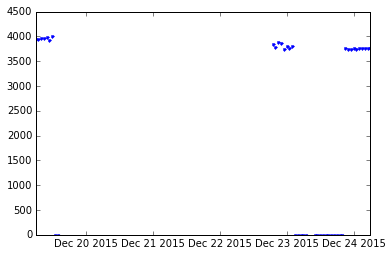

8 3 2015-12-25 20:00:00
DB query secceed!


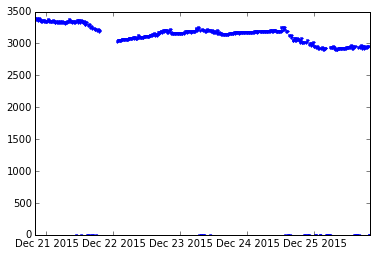

8 4 2015-12-25 20:00:00
DB query secceed!


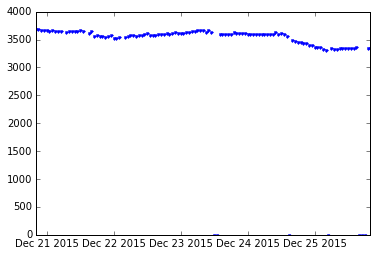

8 5 2015-12-25 18:00:00
DB query secceed!


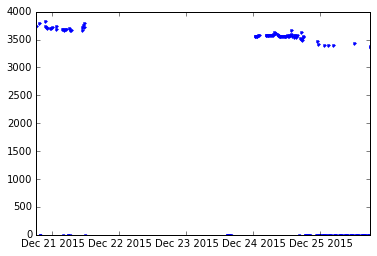

8 6 2015-12-25 20:00:00
DB query secceed!


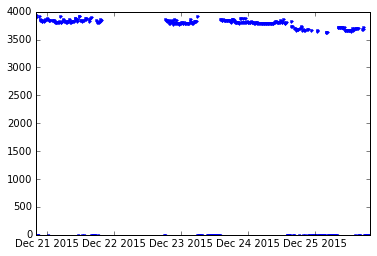

8 7 2015-12-25 20:00:00
DB query secceed!


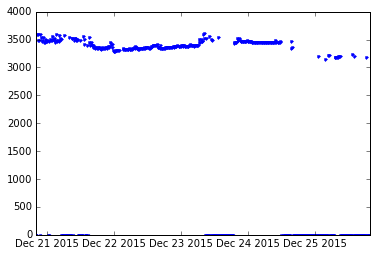

8 8 2015-12-25 20:00:00
DB query secceed!


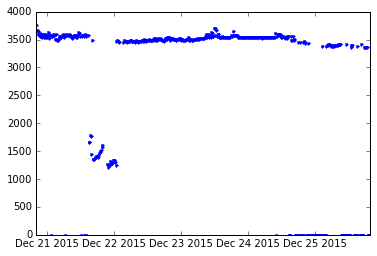

8 9 2015-12-25 20:00:00
DB query secceed!


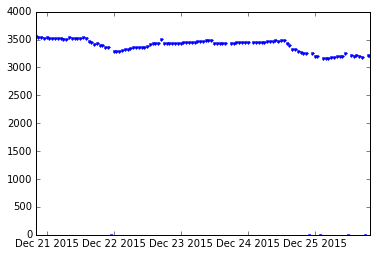

8 10 2015-12-25 19:45:00
DB query secceed!


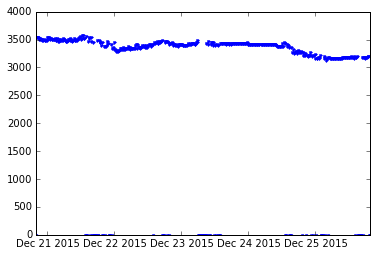

9 1 None
9 2 None
9 3 None
9 4 None
9 5 None
9 6 None
9 7 None
9 8 None
9 9 None
9 10 None
9 11 None
10 1 2016-03-29 16:00:00
DB query secceed!


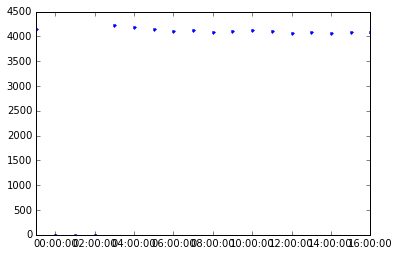

10 2 2016-03-29 16:00:00
DB query secceed!


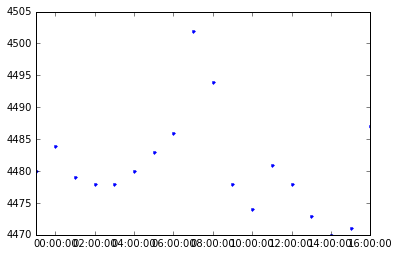

10 3 2016-03-29 16:00:00
DB query secceed!


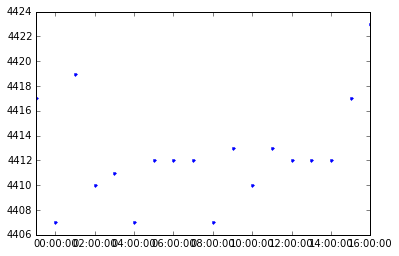

10 4 2016-03-29 16:00:00
DB query secceed!


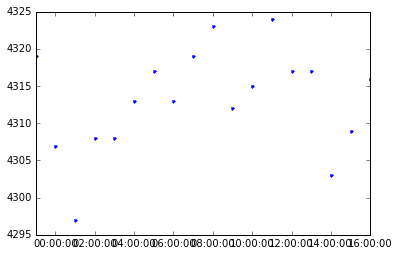

10 5 2016-03-29 16:00:00
DB query secceed!


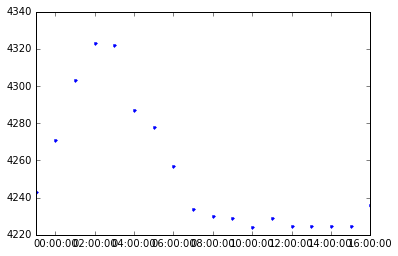

10 6 2016-03-29 16:15:00
DB query secceed!


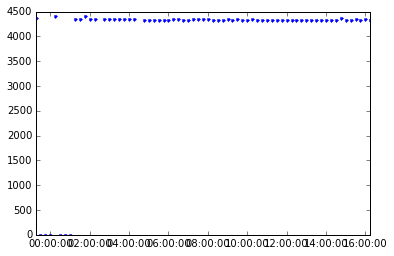

10 7 2016-03-29 16:00:00
DB query secceed!


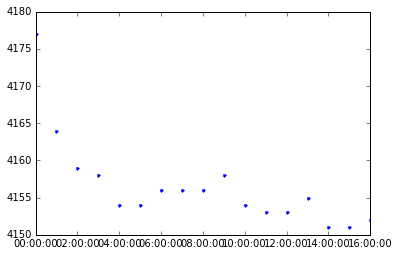

10 8 2016-03-29 16:00:00
DB query secceed!


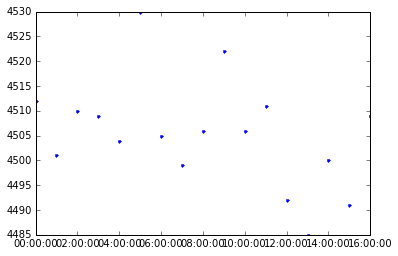

10 9 2016-03-29 16:00:00
DB query secceed!


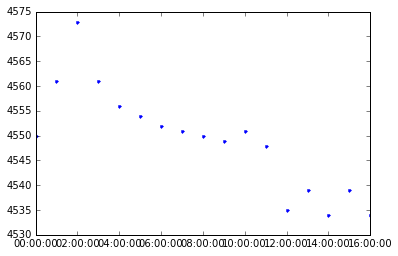

10 10 2016-03-29 16:00:00
DB query secceed!


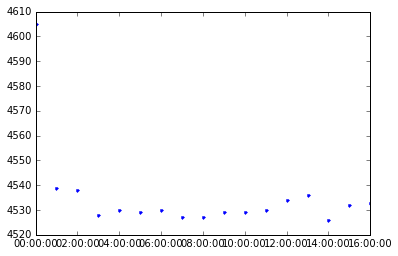

11 1 2015-07-23 10:30:00
DB query secceed!


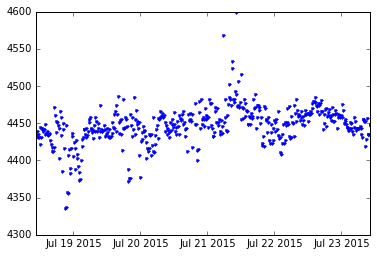

11 2 2015-07-23 11:45:00
DB query secceed!


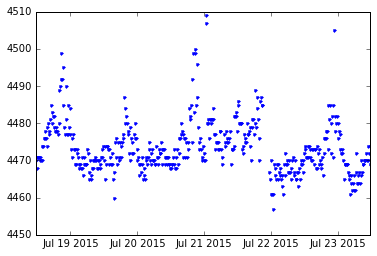

11 3 2015-07-23 11:45:00
DB query secceed!


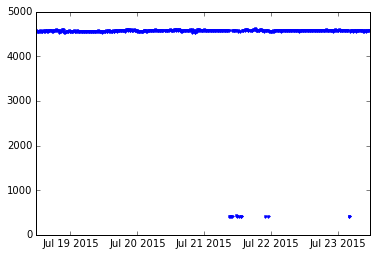

11 4 2015-07-23 11:45:00
DB query secceed!


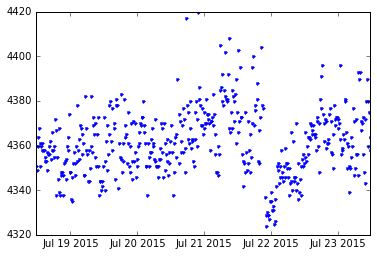

11 5 2014-12-02 23:45:00
DB query secceed!


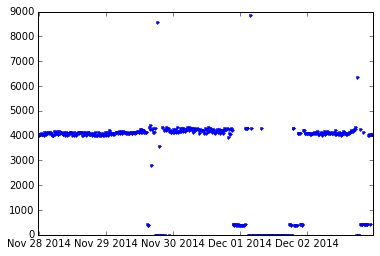

11 6 2014-12-02 23:30:00
DB query secceed!


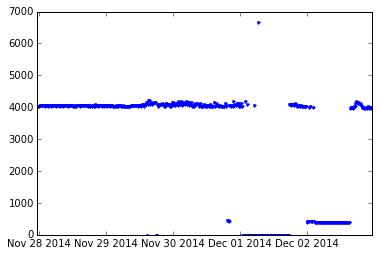

11 7 2015-05-29 10:45:00
DB query secceed!


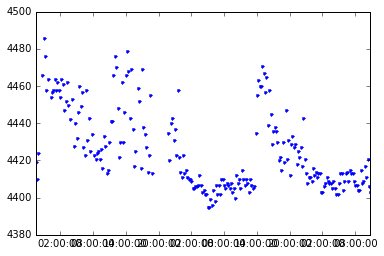

11 8 2015-07-23 11:45:00
DB query secceed!


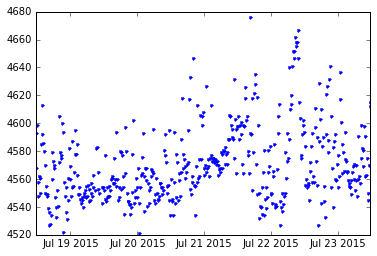

11 9 2015-07-09 18:00:00
DB query secceed!


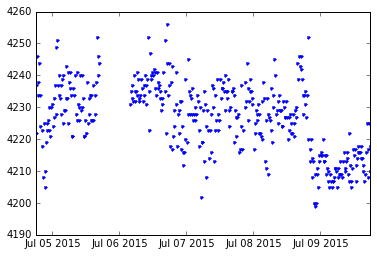

11 10 2015-07-23 11:45:00
DB query secceed!


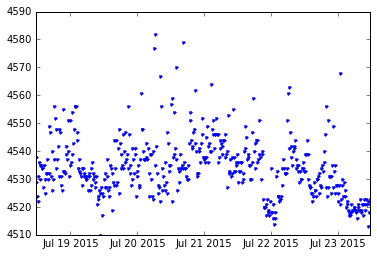

12 1 None
12 2 None
12 3 None
12 4 None
12 5 None
12 6 None
12 7 None
12 8 None
12 9 None
12 10 None
13 1 None
13 2 None
13 3 None
13 4 None
13 5 None
13 6 None
13 7 None
13 8 None
13 9 None
13 10 None


In [3]:
query = ("SELECT site_id, node_id, server_last_update FROM motes")
cnx = mysql.connector.connect(user = "root", password = "root", database = "ar_data")
cursor = cnx.cursor()
try:
    cursor.execute(query)
    id_time = cursor.fetchall()
except mysql.connector.Error as err:
    print(err)
    cursor.close()
    cnx.close()
cursor.close()
cnx.close()
for temp_id_time in id_time:
    site_id = temp_id_time[0]
    node_id = temp_id_time[1]
    server_last_update = temp_id_time[2]
    print (site_id, node_id, server_last_update)
    if server_last_update is None:
        continue
    ending_time = server_last_update
    starting_time = server_last_update - timedelta(days=5)
    db_plot(site_id, node_id, 1, starting_time, ending_time)